In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [99]:
data = pd.read_csv('E:\\singapore\\data\\tested_data.csv')
data = data.drop(columns=['Unnamed: 0'], axis=1)
data_copy = data.copy()
data.head(1)

,month,flat_type,storey_range,resale_price,model_Apartment,model_Maisonette,model_New Generation,model_Special,model_Standard,floor_area_sqm,lease_commence_date,lat,long,distanceWithMrt,distanceWithRaffles,distanceWithGdPri
0,2018-01,0,3,12.429216,0,0,0,0,1,-2.190579,-1.237792,-0.115848,0.157471,-0.860465,-0.872183,0.730986


In [31]:
data.shape

(54296, 16)

In [102]:
resale_price_column = data.pop('resale_price')
data['resale_price'] = resale_price_column

In [103]:
data.head(1)

,month,flat_type,storey_range,model_Apartment,model_Maisonette,model_New Generation,model_Special,model_Standard,floor_area_sqm,lease_commence_date,lat,long,distanceWithMrt,distanceWithRaffles,distanceWithGdPri,resale_price
0,2018-01,0,3,0,0,0,0,1,-2.190579,-1.237792,-0.115848,0.157471,-0.860465,-0.872183,0.730986,12.429216


In [32]:
# np.random.seed(42)

# # Shuffle the indices to create a random order
# indices = np.random.permutation(len(data))
# train_percentage = 0.8
# train_size = int(len(data) * train_percentage)

# # Split the data into training and testing sets
# train = data.iloc[indices[:train_size]]
# test = data.iloc[indices[train_size:]]

In [104]:
train_start_date = '2018-01'
test_start_date = '2020-01'

train = data[data['month'] < test_start_date]
test = data[data['month'] >= test_start_date]

In [101]:
train.head(1)

,month,flat_type,storey_range,resale_price,model_Apartment,model_Maisonette,model_New Generation,model_Special,model_Standard,floor_area_sqm,lease_commence_date,lat,long,distanceWithMrt,distanceWithRaffles,distanceWithGdPri
0,2018-01,0,3,12.429216,0,0,0,0,1,-2.190579,-1.237792,-0.115848,0.157471,-0.860465,-0.872183,0.730986


In [105]:
train = train.drop(columns=['month'], axis= 1)
test = test.drop('month', axis= 1)

In [109]:
test.head(1)

,flat_type,storey_range,model_Apartment,model_Maisonette,model_New Generation,model_Special,model_Standard,floor_area_sqm,lease_commence_date,lat,long,distanceWithMrt,distanceWithRaffles,distanceWithGdPri,resale_price
41283,1,1,0,0,1,0,0,-0.977845,-1.390761,-0.134398,0.05602,0.232615,-0.880719,0.401558,12.487485


In [110]:
train_data = train.values
X = train_data[:, :-1]
Y = train_data[:, -1].reshape(train_data.shape[0], 1)

In [111]:
test_data = test.values
X_test = test_data[:, :-1]
Y_test = test_data[:, -1].reshape(test_data.shape[0], 1)

In [112]:
X = np.vstack((np.ones((X.shape[0], )), X.T)).T
X_test = np.vstack((np.ones((X_test.shape[0], )), X_test.T)).T

In [113]:
print('Shape of X_train:', X.shape)
print('Shape of Y_train:', Y.shape)
print('Shape of X_test:', X_test.shape)
print('Shape of Y_test:', Y_test.shape)

Shape of X_train: (41283, 15)
Shape of Y_train: (41283, 1)
Shape of X_test: (13013, 15)
Shape of Y_test: (13013, 1)


In [24]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np

# # Assuming you have your data in X_train, Y_train, X_test, and Y_test

# # Create a Linear Regression model
# model = LinearRegression()

# # Fit the model to the training data
# model.fit(X, Y)

# # Make predictions on the test data
# Y_pred = model.predict(X_test)

# # Calculate model performance metrics
# mse = mean_squared_error(Y_test, Y_pred)
# r2 = r2_score(Y_test, Y_pred)

# # Print the model coefficients and performance metrics
# print('Model Coefficients:', model.coef_)
# print('Intercept:', model.intercept_)
# print('Mean Squared Error (MSE):', mse)
# print('R-squared (R2):', r2)

Model Coefficients: [[ 0.00000000e+00 -2.21772459e-01  3.71692719e-02 -5.04143796e-01
  -1.88946191e-02 -1.94695073e-01  2.79525202e-01  4.72633200e-01
   1.47955348e-01  3.42142463e-01 -9.67273630e-05  1.29717094e-01
  -1.58800338e-01 -2.63261756e-02 -2.54253165e-01]]
Intercept: [6.80359803]
Mean Squared Error (MSE): 0.8932851366466545
R-squared (R2): 0.03759126125428647


In [25]:
# from sklearn.metrics import mean_squared_error, mean_absolute_error

# # Assuming you have your test data as X_test and y_test
# predicted_log_y = model.predict(X_test)
# predicted_y = np.exp(predicted_log_y)  # Convert back from log scale to original scale

# mse = mean_squared_error(Y_test, predicted_y)
# mae = mean_absolute_error(Y_test, predicted_y)

# print(f'Mean Squared Error: {mse}')
# print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 1.9140062296001505
Mean Absolute Error: 1.2228459767287865


In [26]:
# predict_log_y = model.predict(X_test)
# predict_y = np.exp(predicted_log_y)
# mse = mean_squared_error(Y_test, predicted_y)
# mae = mean_absolute_error(Y_test, predicted_y)
# print('Mean squared error is:', mse)
# print('Mean absolute error is:', mae)

Mean squared error is: 1.9140062296001505
Mean absolute error is: 1.2228459767287865


In [114]:
def model_ln(X, Y, learning_rate, iteration):
    m = Y.size
    theta = np.zeros((X.shape[1], 1))
    cost_list = []
    for i in range(iteration):
        y_pred = np.dot(X, theta)
        cost = (1/(2*m))*np.sum(np.square(y_pred - Y))
        d_theta = (1/m) * np.dot(X.T, y_pred - Y)
        theta = theta - learning_rate*d_theta
        cost_list.append(cost)
            
        if (i%(iteration/10) == 0):
            print('Cost is:', cost)
    return theta, cost_list

In [117]:
iteration = 10000
learning_rate = 0.005
theta, cost_list=  model_ln(X, Y, learning_rate = learning_rate, iteration=iteration)
print(theta)

Cost is: 83.08767083054029
Cost is: 0.6515728940185149
Cost is: 0.5226843091876741
Cost is: 0.45039127938146517
Cost is: 0.3961201092657741
Cost is: 0.3524905297566872
Cost is: 0.3159074693356124
Cost is: 0.2843904402077383
Cost is: 0.2567660649323521
Cost is: 0.23228958321154486
[[ 7.39385954]
 [ 2.70320215]
 [ 0.05375846]
 [-0.60631131]
 [-0.34418126]
 [-0.16671761]
 [ 0.10741568]
 [-0.71258405]
 [-2.0382039 ]
 [-0.11945176]
 [-0.12548731]
 [ 0.07490744]
 [-0.04064641]
 [ 0.0254169 ]
 [ 0.02862439]]


In [ ]:
# X_train = train_data.drop('resale_price', inplace=True)
# y_train = train_data['resale_price']

# X_test = test_data.drop('resale_price', inplace=True)
# y_train = test_data['resale_price']

In [122]:
y_pred= np.dot(X_test, theta)
error = (1/X_test.shape[0])*np.sum(np.abs(y_pred - Y_test))


In [123]:
error

0.47951418592960804

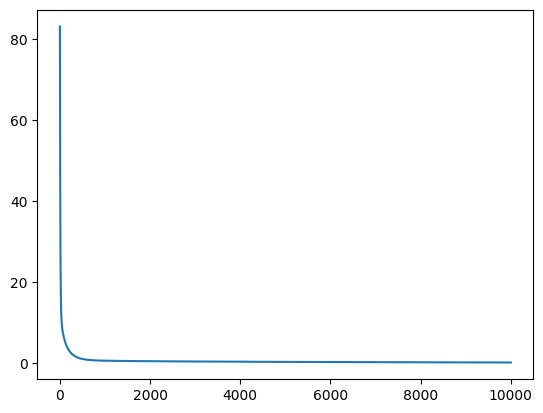

In [124]:
rng = np.arange(0, iteration)
plt.plot(rng, cost_list)
plt.show()

In [125]:
print(round(error, 4)*100, '%')
print(round(1 - error, 4)*100, '%')

47.949999999999996 %
52.05 %


In [90]:
test.shape

(13013, 15)

In [88]:
test.head(1)

,flat_type,storey_range,model_Apartment,model_Maisonette,model_New Generation,model_Special,model_Standard,floor_area_sqm,lease_commence_date,lat,long,distanceWithMrt,distanceWithRaffles,distanceWithGdPri,resale_price
41283,1,1,0,0,1,0,0,-0.977845,-1.390761,-0.134398,0.05602,0.232615,-0.880719,0.401558,12.487485


In [89]:
new_feature_values = np.array([1, 1, 0, 0, 1, 0, 0, -0.977845, -1.390761, -0.134398, 0.05602, 0.232615,	-0.880719, 0.401558])

# Reshape the input values to match the shape expected by the model
new_feature_values_reshaped = new_feature_values.reshape(1, -1)

# Make predictions using the trained model
predicted_price = np.dot(new_feature_values_reshaped, theta)

# Print the predicted price
print('Predicted Price:', predicted_price[0, 0])

ValueError: shapes (1,14) and (15,1) not aligned: 14 (dim 1) != 15 (dim 0)